In [7]:

# LSTM model dummy
# Dummy model to predict the climate time series data

# !nvidia-smi

import tensorflow as tf 
# !pip install tensorflow-gpu
print(tf.__version__)

print('1: ', tf.config.list_physical_devices('GPU'))


2.6.2
1:  []


In [8]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import tabloo
from tensorflow import keras
# from keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout, Bidirectional, RepeatVector, TimeDistributed
import math
from sklearn.metrics import mean_squared_error

## Data Processing

### Data Fetching and Cleaning

In [9]:
#getting data and sorting it into all the present IDs

scaler = MinMaxScaler()
df_normal = pd.read_csv('train_1.csv', delimiter=',')
df_normal = df_normal.dropna(axis=1, how='all')
df_normal[['Time']] = scaler.fit_transform(df_normal[['Time']])

# all_IDs = np.array(df_normal.groupby(['ID']).count().index.values)
# print((np.sort(all_IDs)))
all_IDs = np.array(['id1','id5'])
print(all_IDs)
df_ID_list = list()
for i in all_IDs:
    temp = df_normal[df_normal['ID']==i].dropna(axis=1, how='all')
    temp = temp.drop(temp[['Label']],axis =1)
    temp = temp.drop(temp[['ID']],axis =1)
    temp = temp.iloc[0:100000,0:2]
    df_ID_list.append(temp)

for i in range(len(df_ID_list)):
    # tabloo.show(i)
    print(len(df_ID_list[i]))
    print(df_ID_list[i])

['id1' 'id5']
100000
                Time   Signal1
5       7.768963e-07  0.000000
12      1.743012e-06  0.000000
20      2.709128e-06  0.000000
27      3.675243e-06  0.000000
33      4.641359e-06  0.000000
...              ...       ...
716667  9.661890e-02  0.824540
716672  9.661986e-02  0.824310
716680  9.662083e-02  0.824080
716687  9.662180e-02  0.823829
716695  9.662276e-02  0.823559

[100000 rows x 2 columns]
100000
                Time   Signal1
0       0.000000e+00  0.000000
6       9.661157e-07  0.000000
13      1.932231e-06  0.000000
21      2.898347e-06  0.000000
28      3.864463e-06  0.000000
...              ...       ...
716661  9.661843e-02  0.187579
716669  9.661939e-02  0.187527
716675  9.662036e-02  0.187474
716683  9.662133e-02  0.187417
716690  9.662229e-02  0.187356

[100000 rows x 2 columns]


In [10]:
df_ID_list[1]['Signal1']

0         0.000000
6         0.000000
13        0.000000
21        0.000000
28        0.000000
            ...   
716661    0.187579
716669    0.187527
716675    0.187474
716683    0.187417
716690    0.187356
Name: Signal1, Length: 100000, dtype: float64

['id1' 'id5']
2791
            Time  Signal1_of_ID
180001  0.000034       0.607940
180008  0.000392       0.608011
180014  0.000751       0.608101
180023  0.001109       0.608181
180029  0.001467       0.608261
...          ...            ...
199967  0.998421       0.588852
199976  0.998779       0.588862
199981  0.999138       0.588832
199990  0.999496       0.588762
199996  0.999854       0.588672

[2791 rows x 2 columns]
2791
            Time  Signal1_of_ID
180002  0.000162       0.138320
180010  0.000521       0.138340
180016  0.000879       0.138358
180025  0.001237       0.138377
180030  0.001596       0.138402
...          ...            ...
199970  0.998514       0.193639
199977  0.998872       0.196394
199983  0.999230       0.199140
199992  0.999589       0.201689
199998  0.999947       0.204236

[2791 rows x 2 columns]


Text(0.5, 1.0, 'Plateau Attack (180000-190000) values')

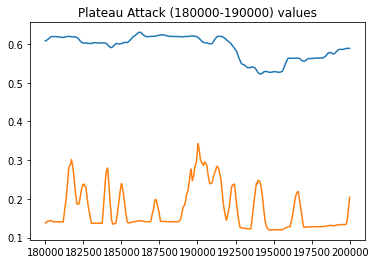

In [11]:
df_test_plat_ID1 = pd.read_csv('test_plateau.csv', delimiter=',')
df_test_plat_ID1 = df_test_plat_ID1.dropna(axis=1, how='all')
# df_test_plat_ID1 = df_test_plat_ID1.iloc[0:(int(len(df_test_plat_ID1)/5)),:]
df_test_plat_ID1 = df_test_plat_ID1.iloc[180000:200000,:]
df_test_plat_ID1[['Time']] = scaler.fit_transform(df_test_plat_ID1[['Time']])

# df_test_plat_ID1.iloc[180000:250000,0:2]

all__test_IDs = np.array(['id1','id5'])
print(all_IDs)
df_testID_list = list()

for i in all__test_IDs:
    tempTest = df_test_plat_ID1[df_test_plat_ID1['ID']==i].dropna(axis=1, how='all')
    tempTest = tempTest.drop(tempTest[['Label']],axis =1)
    tempTest = tempTest.drop(tempTest[['ID']],axis =1)
    tempTest = tempTest.iloc[0:100000,0:2]
    df_testID_list.append(tempTest)

for i in range(len(df_testID_list)):
    # tabloo.show(i)
    print(len(df_testID_list[i]))
    print(df_testID_list[i])


plt.plot(df_testID_list[0].iloc[:,1:2])
plt.plot(df_testID_list[1].iloc[:,1:2])
plt.title('Plateau Attack (180000-190000) values')

In [12]:


# create a test dataset of 30 sequences from the provided Data
def createTestDataset(x,y,time_step):
    Xs,Ys = [],[]
    for j in range(len(x)):
        v = []
        p = []
        for i in range(len(x[j])-time_step):
            y = x[j]['Signal1_of_ID'].iloc[i:i+time_step].values
            v.append(y)
            p.append(x[j]['Signal1_of_ID'].iloc[i+time_step])
        Xs.append(v)
        Ys.append(p)
    
    # print(Xs)
    # print(Ys)
            
    return np.array(Xs),np.array(Ys)
    

In [13]:


# create a dataset of 30 sequences from the provided Data
def creatDataset(x,y,time_step):
    Xs,Ys = [],[]
    for j in range(len(x)):
        v = []
        p = []
        for i in range(len(x[j])-time_step):
            y = x[j]['Signal1'].iloc[i:i+time_step].values
            v.append(y)
            p.append(x[j]['Signal1'].iloc[i+time_step])
        Xs.append(v)
        Ys.append(p)
    
    # print(Xs)
    # print(Ys)
            
    return np.array(Xs),np.array(Ys)
    

In [14]:
TIME_STEP = 30
X_train, Y_train = creatDataset(df_ID_list, df_ID_list, TIME_STEP)
X_test, Y_test = createTestDataset(df_testID_list, df_testID_list, TIME_STEP)

# X_train.shape

# X_test.shape

In [15]:
print(X_train.shape)
print(Y_train.shape)

(2, 99970, 30)
(2, 99970)


In [16]:
print(X_test.shape)
print(Y_test.shape)

(2, 2761, 30)
(2, 2761)


In [33]:
a = np.reshape(X_train,(-1,2,30,1))
b = np.reshape(Y_train,(-1,2,1))

print(a.shape)
print(b.shape)

(99970, 2, 30, 1)
(99970, 2, 1)


In [151]:
p = np.reshape(X_test,(-1,2,30,1))
q = np.reshape(Y_test,(-1,2,1))
print(p.shape)
print(q.shape)

(2761, 2, 30, 1)
(2761, 2)


In [27]:
print(a.shape)
print(a)

(99970, 2, 30, 1)
[[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 ...


 [[[0.18904338]
   [0.18902971]
   [0.18901376]
   ...
   [0.18779092]
   [0.18773627]
   [0.18768162]]

  [[0.18902971]
   [0.18901376]
   [0.18899326]
   ...
   [0.18773627]
   [0.18768162]
   [0.18763152]]]


 [[[0.18901376]
   [0.18899326]
   [0.18897049]
   ...
   [0.18768162]
   [0.18763152]
   [0.18757913]]

  [[0.18899326]
   [0.

In [34]:


# n_features = X_train.shape[2]
model= Sequential()
model.add(
    TimeDistributed(
        LSTM(128, activation='relu', return_sequences = True), 
        input_shape=(2,30,1) #all IDs LSTMs 
    )
)

model.add(
    TimeDistributed(
        Flatten() 
    )
)
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(TimeDistributed(Dense(30)))
model.compile(optimizer='adam', loss='mean_absolute_error')

model.summary()
# plot_model(model, to_file='model_plot.png', 
#            show_shapes=True, show_layer_names=True,
#            show_layer_activations=False, expand_nested=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_6 (TimeDist (None, 2, 30, 128)        66560     
_________________________________________________________________
time_distributed_7 (TimeDist (None, 2, 3840)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 2, 512)            1966592   
_________________________________________________________________
dense_7 (Dense)              (None, 2, 256)            131328    
_________________________________________________________________
time_distributed_8 (TimeDist (None, 2, 30)             7710      
Total params: 2,172,190
Trainable params: 2,172,190
Non-trainable params: 0
_________________________________________________________________


#### Model Fitting

In [35]:
# fit model
model.fit(a, b, epochs=15, batch_size=30, validation_split=0.1, shuffle=False)
model.save("multi_ID_LSTM_autoenc")

Epoch 1/15
2093/3000 [===================>..........] - ETA: 12s - loss: 0.0156

#### Training loss, finding Threshold

In [ ]:
reconstructed_model = keras.models.load_model("single_ID_LSTM_autoenc")

In [157]:
x_test_predict = reconstructed_model.predict(p, verbose=0)
x_train_predict = reconstructed_model.predict(a, verbose=0)

print(x_train_predict.shape)
print(x_test_predict.shape)

(99970, 2, 30)
(2761, 2, 30)


In [155]:
x_test_predict_X= x_test_predict[:,0]
print(x_test_predict[:,0])
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print(p[:,0])
print("\n------------------------------------------------------------------------------------------------------------------\n")
print(x_test_predict[:,1])
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print(p[:,1])

[[0.60004914 0.5995057  0.59884816 ... 0.60002774 0.60016376 0.6023053 ]
 [0.6004744  0.5999302  0.599272   ... 0.6004533  0.60059005 0.602737  ]
 [0.60093653 0.6003911  0.5997328  ... 0.600915   0.6010527  0.60320574]
 ...
 [0.19074869 0.19120829 0.19103171 ... 0.1905846  0.19067028 0.19076052]
 [0.19764659 0.19807838 0.19795541 ... 0.19738501 0.19747576 0.19760795]
 [0.20430212 0.2046895  0.20460731 ... 0.20399427 0.20409533 0.2042341 ]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[0.60794048 0.60801057 0.60810072 ... 0.61240475 0.61259493 0.61279512]
 [0.60810072 0.60818084 0.60826096 ... 0.61279512 0.61307543 0.61331565]
 [0.60826096 0.60837101 0.60848106 ... 0.61331565 0.61357592 0.61386626]
 ...
 [0.13382906 0.1338245  0.1338245  ... 0.18227575 0.18515726 0.18804562]
 [0.1338245  0.13420764 0.13459762 ... 0.18804562 0.19087426 0.19363869]
 [0.13459762 0.13530649 0.13690783 ... 0.19363869 0.196394   0.19914022]]

-----------------

/tmp/ipykernel_3018/423044375.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_mae_loss_2,bins=50,kde=True )


<Axes: ylabel='Density'>

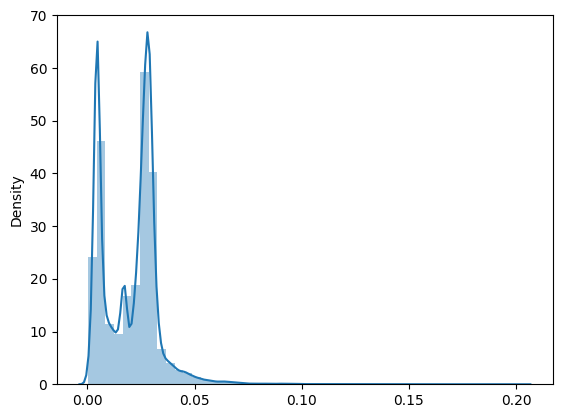

In [162]:
# Seperate test loss calculation
train_mae_loss_1 = np.mean(np.abs(x_train_predict[:,0] - a[:,0]), axis=1)
train_mae_loss_2 = np.mean(np.abs(x_train_predict[:,1] - a[:,1]), axis=1)
sns.distplot(train_mae_loss_2,bins=50,kde=True )

/tmp/ipykernel_3018/372716654.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_mae_loss_1,bins=50,kde=True )


<Axes: ylabel='Density'>

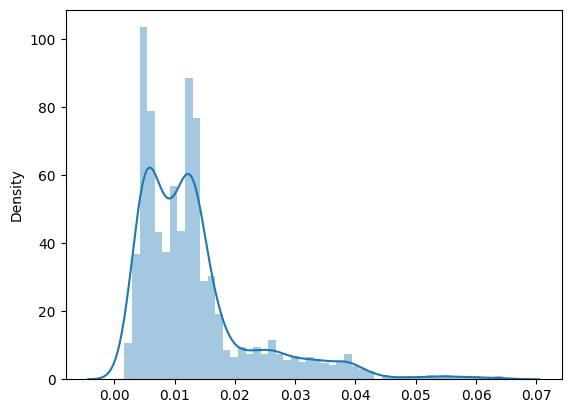

In [160]:
# Seperate test loss calculation
test_mae_loss_1 = np.mean(np.abs(x_test_predict[:,0] - p[:,0]), axis=1)
test_mae_loss_2 = np.mean(np.abs(x_test_predict[:,1] - p[:,1]), axis=1)
sns.distplot(test_mae_loss_1,bins=50,kde=True )

In [197]:
yo = df_testID_list[0][TIME_STEP:].Signal1_of_ID
yo = yo.dropna()
yo.head()

180216    0.613075
180223    0.613316
180229    0.613576
180238    0.613866
180244    0.614187
Name: Signal1_of_ID, dtype: float64

In [252]:
print(df_testID_list[1][TIME_STEP:].Signal1_of_ID)

180211    0.142619
180217    0.142674
180225    0.142733
180231    0.142799
180240    0.142872
            ...   
199970    0.193639
199977    0.196394
199983    0.199140
199992    0.201689
199998    0.204236
Name: Signal1_of_ID, Length: 2762, dtype: float64


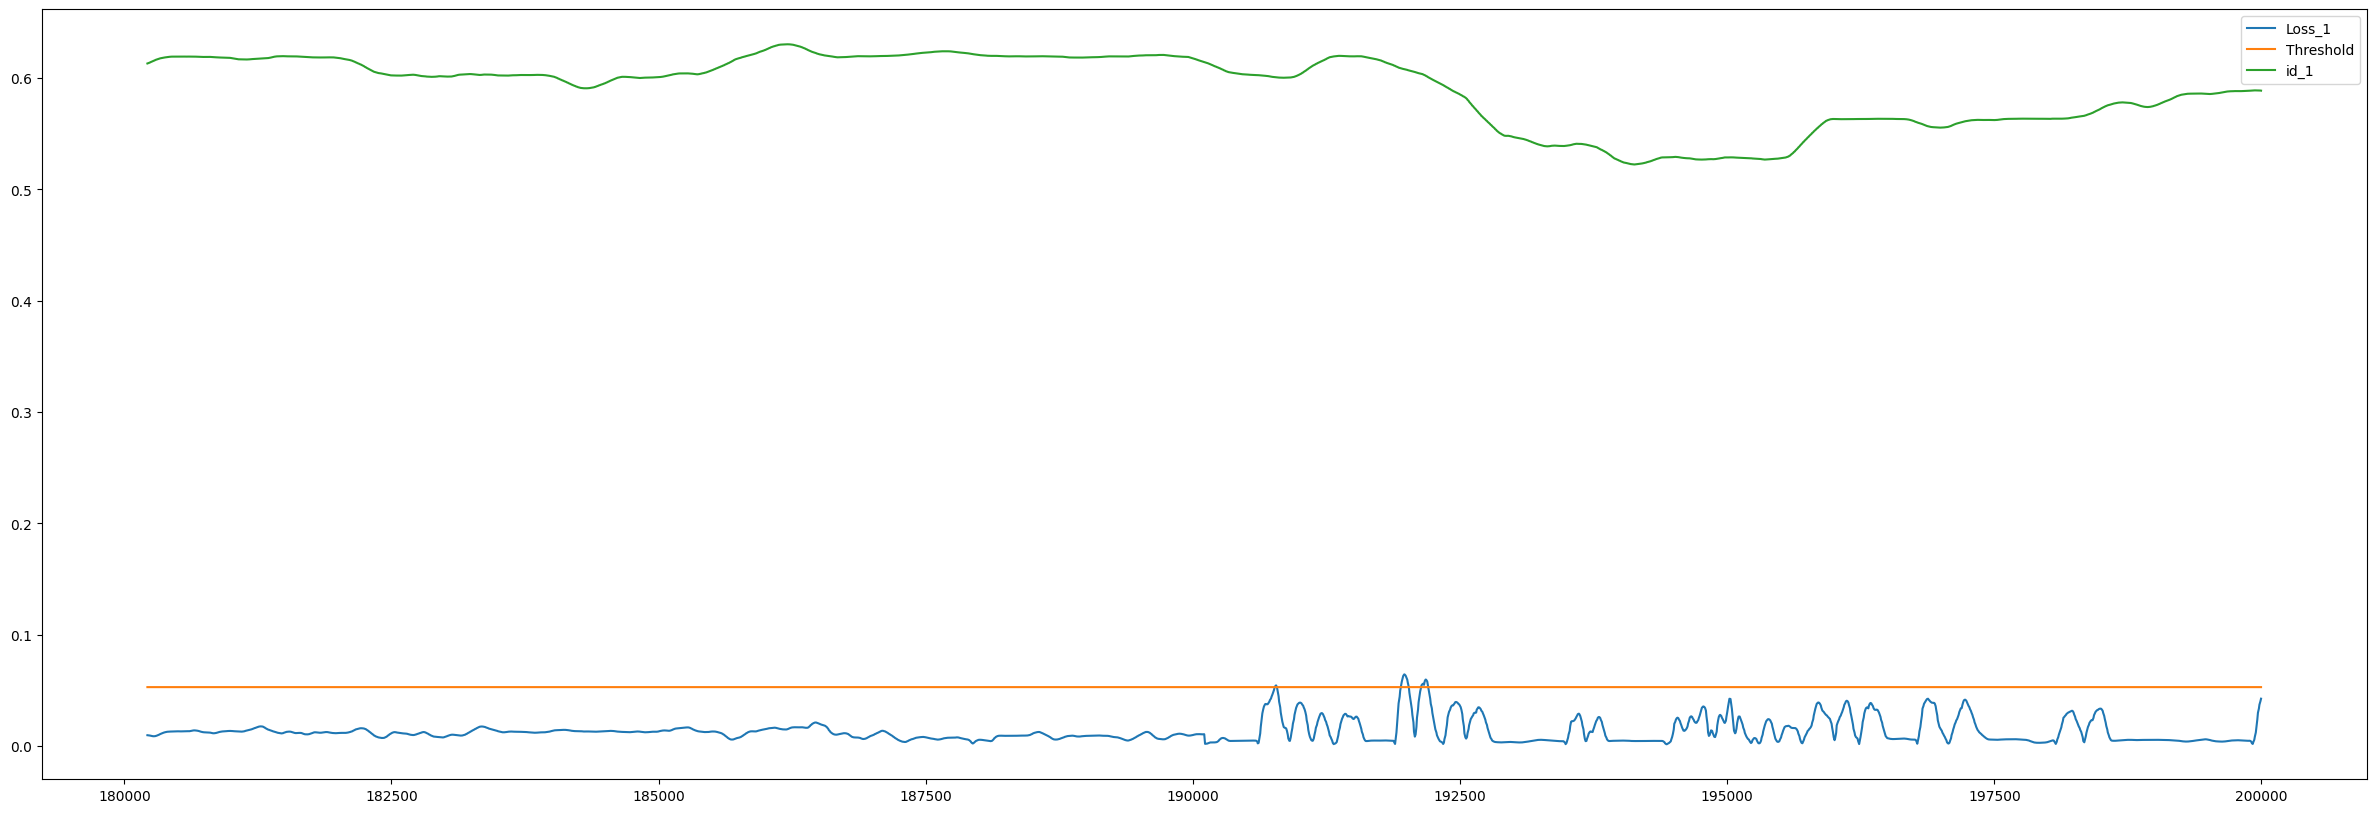

In [254]:
# #plot the threshoold vs the actual loss values
test_score_df = pd.DataFrame(index=df_testID_list[0][TIME_STEP:].index)
test_score_df['id_1'] = df_testID_list[0][TIME_STEP:].Signal1_of_ID
test_score_df['loss_1'] = test_mae_loss_1
test_score_df['threshold'] = 0.053
test_score_df['anomaly_1'] = test_score_df.loss_1 > test_score_df.threshold

plt.figure(figsize=(30,10))
plt.plot(test_score_df.index,test_score_df.loss_1, label='Loss_1')
plt.plot(test_score_df.index,test_score_df.threshold, label='Threshold')
plt.plot(test_score_df.index,test_score_df.id_1, label='id_1')
plt.legend()

In [250]:
print(test_score_df.id_5)
print(df_testID_list[1][TIME_STEP:].Signal1_of_ID)

180216   NaN
180223   NaN
180229   NaN
180238   NaN
180244   NaN
          ..
199967   NaN
199976   NaN
199981   NaN
199990   NaN
199996   NaN
Name: id_5, Length: 2761, dtype: float64
180217    0.142674
180225    0.142733
180231    0.142799
180240    0.142872
180245    0.142943
            ...   
199970    0.193639
199977    0.196394
199983    0.199140
199992    0.201689
199998    0.204236
Name: Signal1_of_ID, Length: 2761, dtype: float64


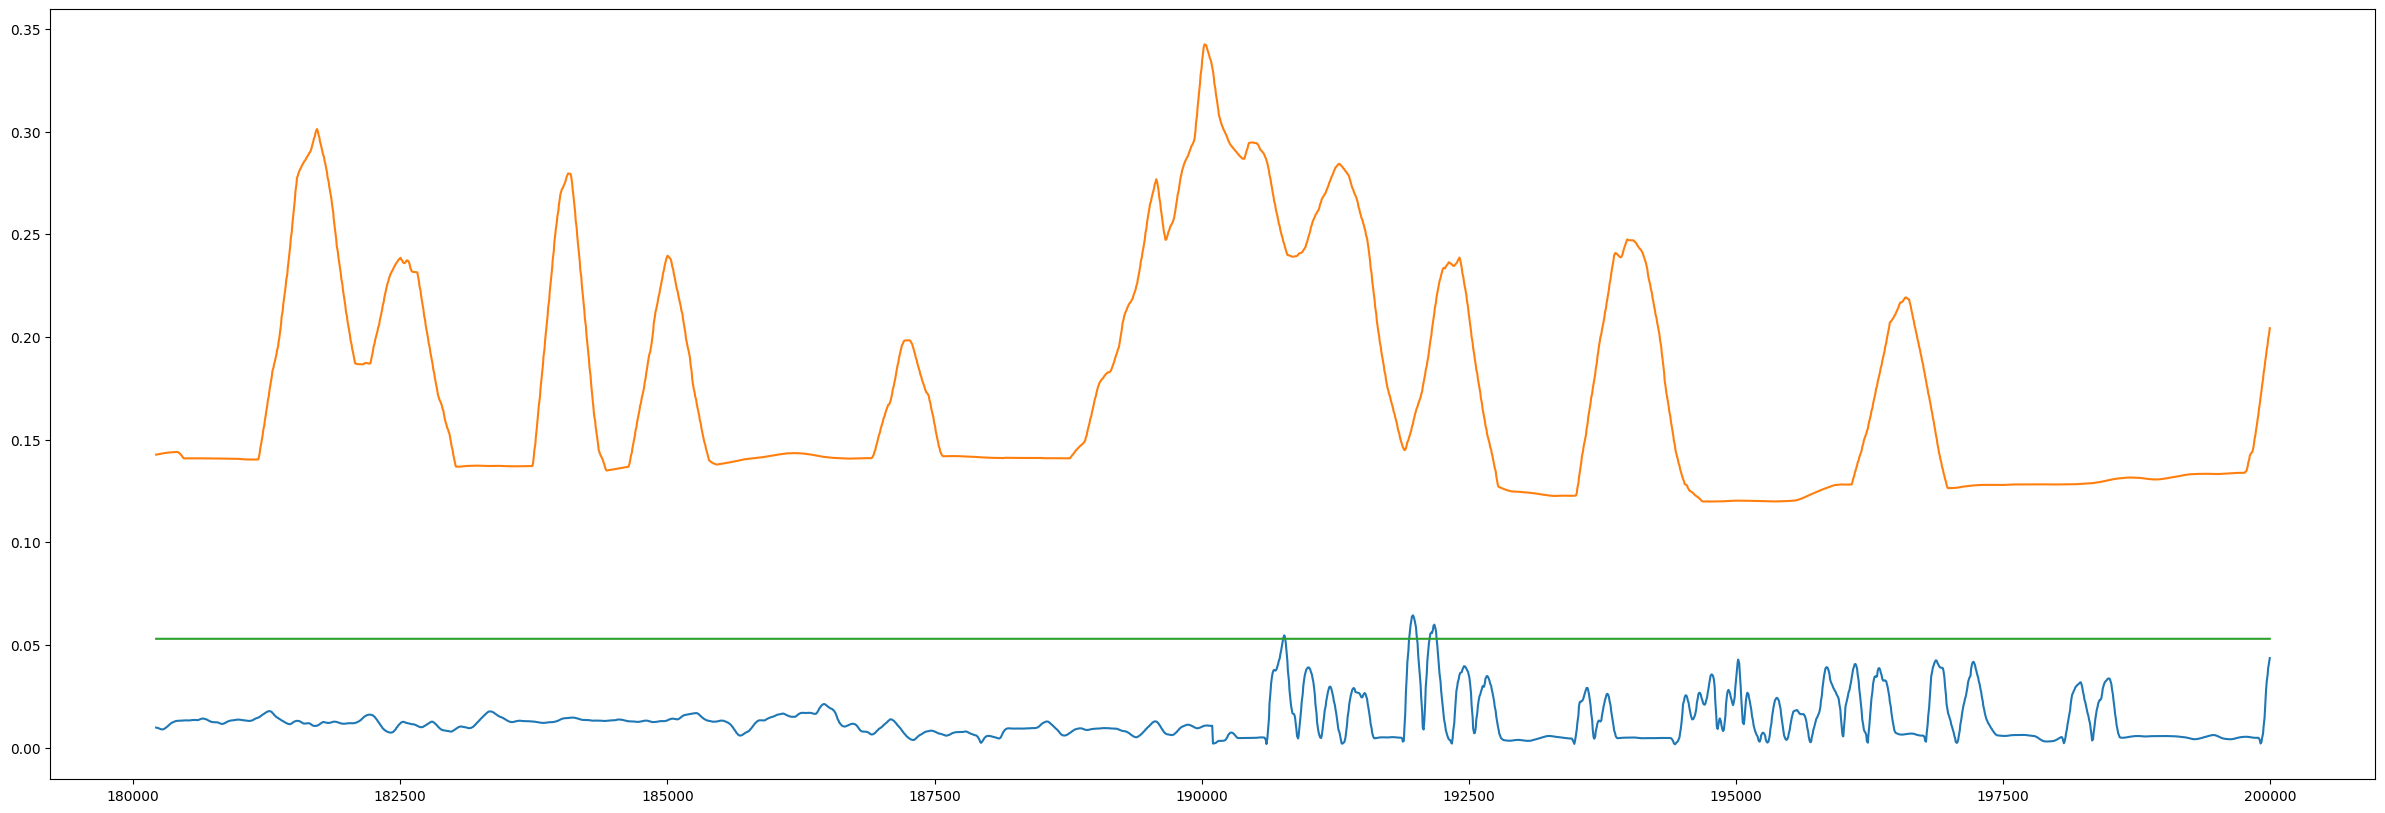

In [257]:
# #plot the threshoold vs the actual loss values
test_score_df_2 = pd.DataFrame(index=df_testID_list[1][TIME_STEP:].index)
test_score_df_2['id_5'] = df_testID_list[1][TIME_STEP:].Signal1_of_ID
test_score_df_2['loss_2'] = test_mae_loss_2
test_score_df_2['threshold'] = 0.053
test_score_df_2['anomaly_2'] = test_score_df_2.loss_2 > test_score_df_2.threshold

plt.figure(figsize=(30,10))
plt.plot(test_score_df.index,test_score_df_2.loss_2, label=';oss_2')
plt.plot(test_score_df.index,test_score_df_2.id_5, label='id_5')
plt.plot(test_score_df.index,test_score_df_2.threshold, label='Threshold')

In [259]:
anomalies_1 = test_score_df[test_score_df.anomaly_1 == True]
anomalies_2 = test_score_df_2[test_score_df_2.anomaly_2 == True]
anomalies_2

,id_5,loss_2,threshold,anomaly_2
190768,0.246439,0.053459,0.053,True
190775,0.245081,0.054668,0.053,True
190781,0.243847,0.053897,0.053,True
191951,0.152107,0.056263,0.053,True
191957,0.153355,0.059509,0.053,True
191964,0.154796,0.062045,0.053,True
191972,0.156239,0.063835,0.053,True
191979,0.157744,0.064438,0.053,True
191985,0.159376,0.063870,0.053,True
191994,0.160941,0.062519,0.053,True


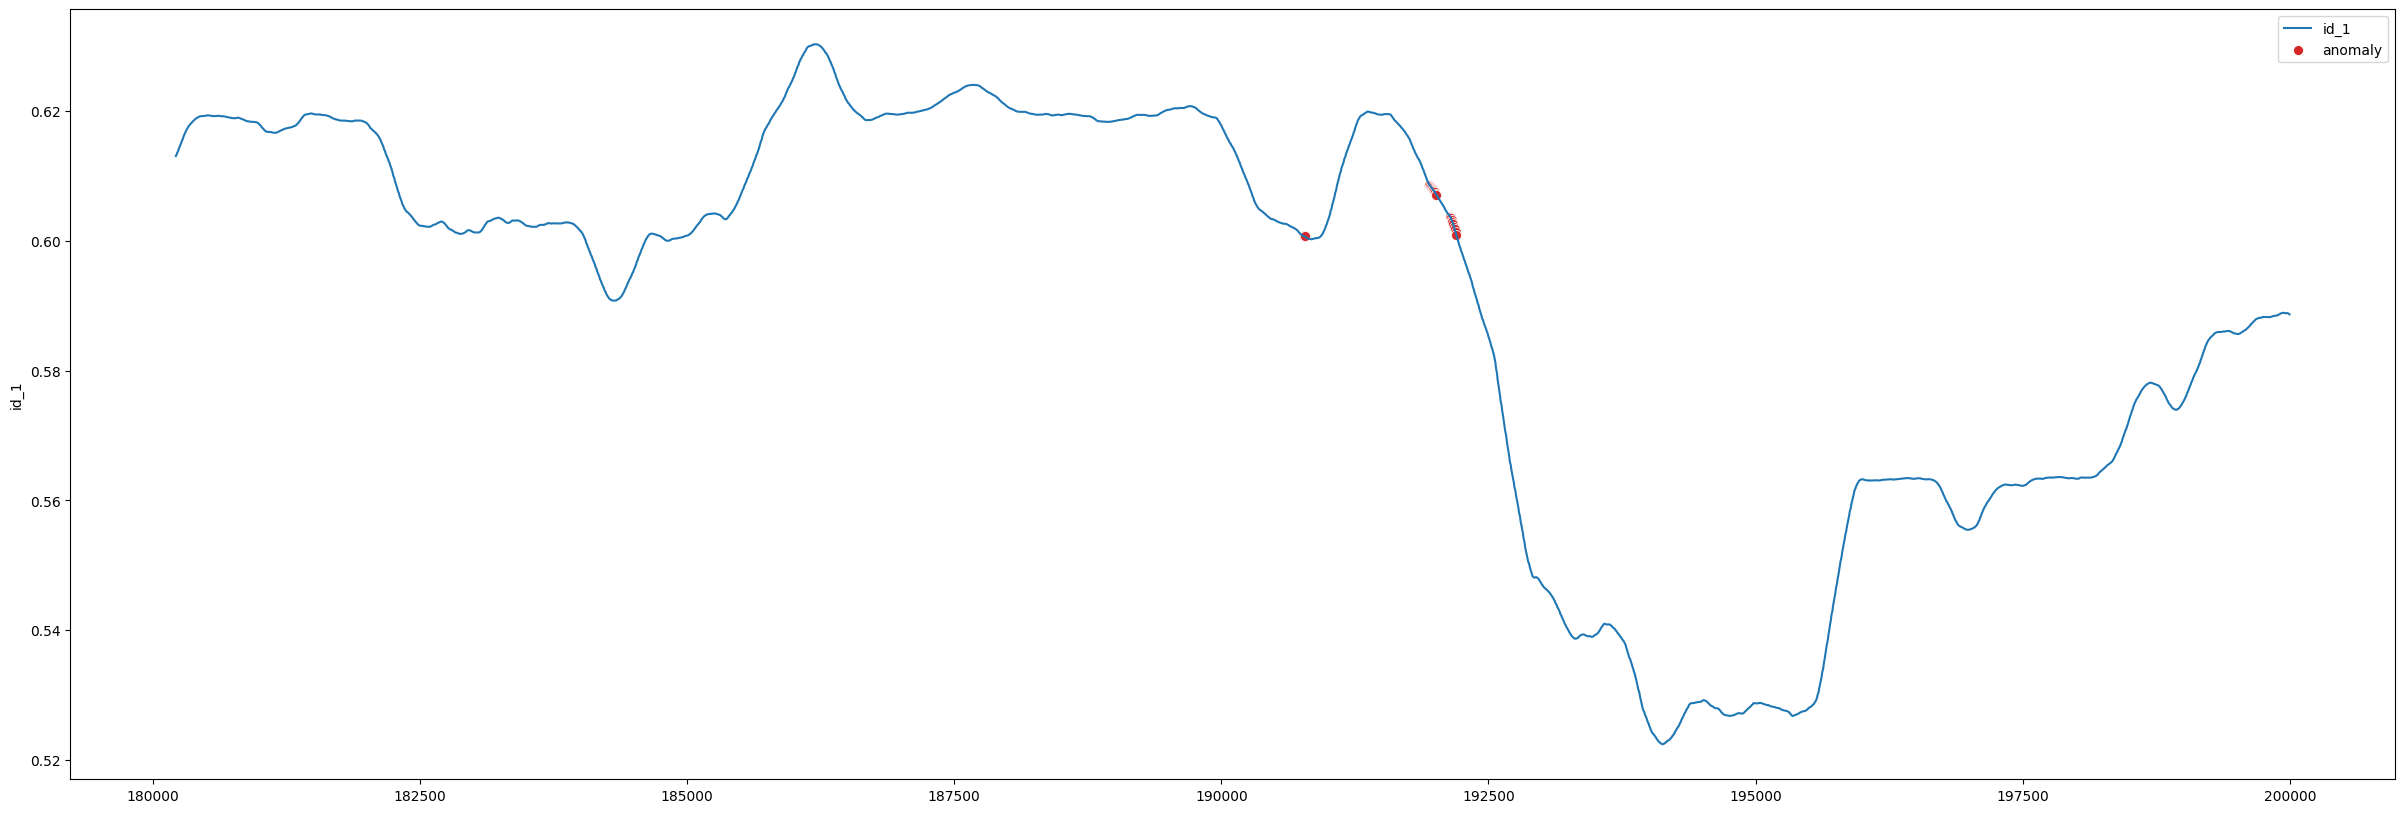

In [232]:
plt.figure(figsize=(30,10))
plt.plot(
  test_score_df.index, 
  test_score_df.id_1, 
  label='id_1'
);

sns.scatterplot(
  anomalies_1.id_1,
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.legend();

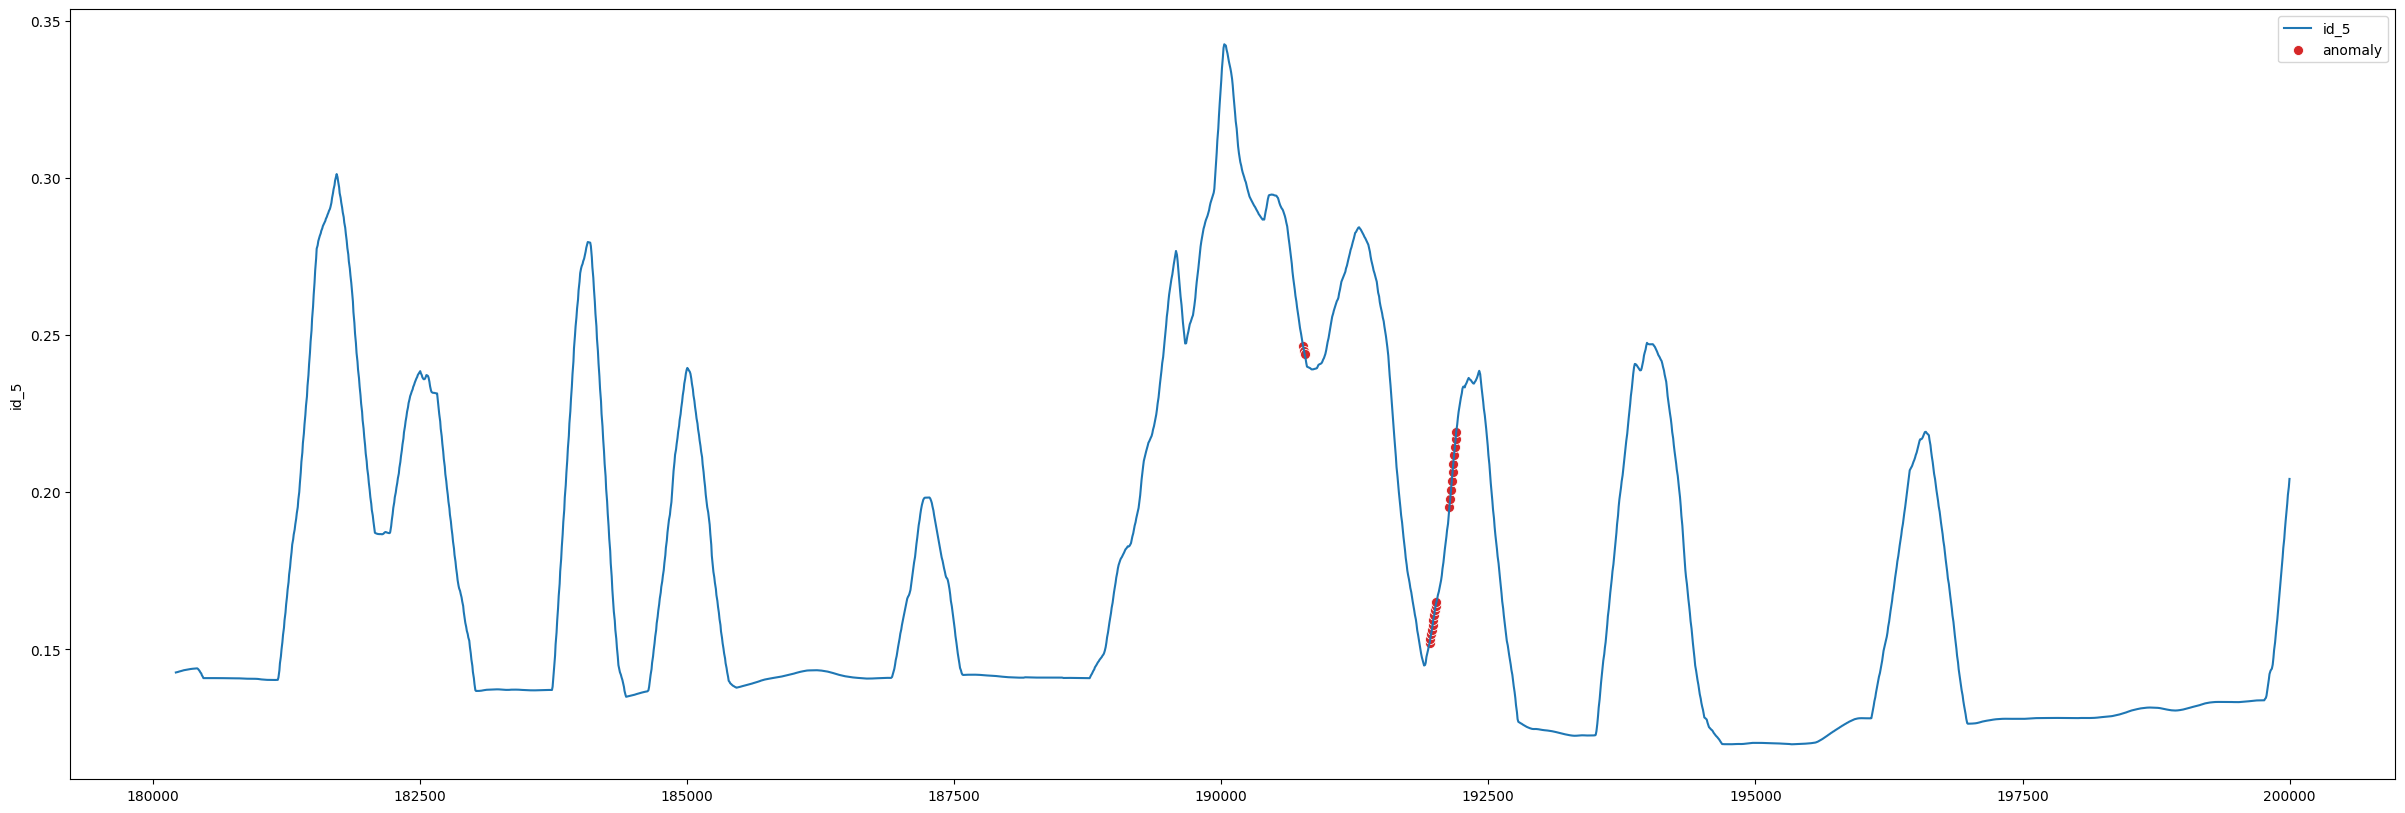

In [262]:
plt.figure(figsize=(30,10))
plt.plot(
  test_score_df_2.index, 
  test_score_df_2.id_5, 
  label='id_5'
);

sns.scatterplot(
  anomalies_2.id_5,
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.legend();

In [123]:
x_train_predict = reconstructed_model.predict(a, verbose=0)
a_train_predict = np.reshape(x_train_predict,(2,30,-1))
a_predict = np.reshape(a,(2,30,-1))
train_mae_loss = np.mean(np.abs(a_train_predict - a_predict), axis=1)
train_mae_loss = np.reshape(train_mae_loss,(-1,2))

print("a_Predict  = \n")
print(a_predict.shape)
print("a_original  = \n")
print(a.shape)
print("Train Loss  = \n")
print(train_mae_loss.shape)

# sns.distplot(train_mae_loss[:,0],bins=50,kde=True )

a_Predict  = 

(2, 30, 99970)
a_original  = 

(99970, 2, 30)
Train Loss  = 

(99970, 2)


/tmp/ipykernel_3018/2379749956.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_mae_loss[:,0],bins=50,kde=True )


<Axes: ylabel='Density'>

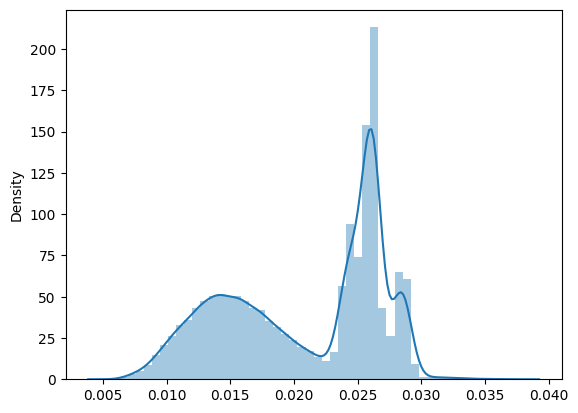

In [124]:
sns.distplot(train_mae_loss[:,0],bins=50,kde=True )

### Test Loss

p Predict  = 

(2, 30, 2761)
p original  = 

(2761, 2, 30)
Test Loss  = 

(2761, 2)


/tmp/ipykernel_3018/588716996.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_mae_loss[:,0],bins=50,kde=True )


<Axes: ylabel='Density'>

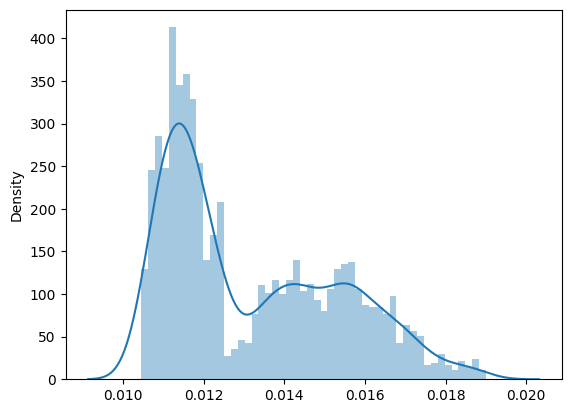

In [125]:
THRESHOLD = 0.030

x_test_predict = reconstructed_model.predict(p, verbose=0)
p_test_predict = np.reshape(x_test_predict,(2,30,-1))
p_predict = np.reshape(p,(2,30,-1))
test_mae_loss = np.mean(np.abs(p_test_predict - p_predict), axis=1)
test_mae_loss = np.reshape(test_mae_loss,(-1,2))
# sns.distplot(train_mae_loss,bins=50,kde=True )
print("p Predict  = \n")
print(p_predict.shape)
print("p original  = \n")
print(p.shape)
print("Test Loss  = \n")
print(test_mae_loss.shape)
sns.distplot(test_mae_loss[:,0],bins=50,kde=True )


### Test Score Dataframe Creation and plotting


In [ ]:
print(p.shape)
print(x_test_predict.shape)
print(p_predict.shape)
print(test_mae_loss.shape)
print(p_predict)
print(test_mae_loss)


(2761, 2, 30)
(2761, 2, 30)
(2761, 30, 2)
(2761, 30)
[[[0.60004914 0.5995057 ]
  [0.59884816 0.59892905]
  [0.5998079  0.59986705]
  ...
  [0.5992687  0.6001608 ]
  [0.60055214 0.60023665]
  [0.60037297 0.60251725]]

 [[0.6004744  0.5999302 ]
  [0.599272   0.5993515 ]
  [0.6002326  0.60029274]
  ...
  [0.5997082  0.60060245]
  [0.60099465 0.6006783 ]
  [0.6008154  0.60296535]]

 [[0.60093653 0.6003911 ]
  [0.5997328  0.5998106 ]
  [0.60069376 0.60075575]
  ...
  [0.60019547 0.60109204]
  [0.6014859  0.601167  ]
  [0.6013053  0.60346174]]

 ...

 [[0.19074869 0.19120829]
  [0.19103171 0.19089992]
  [0.19099657 0.19096515]
  ...
  [0.19433023 0.19449621]
  [0.19424534 0.19400516]
  [0.19409287 0.19420841]]

 [[0.19764659 0.19807838]
  [0.19795541 0.19771174]
  [0.19780344 0.19789547]
  ...
  [0.20105116 0.2012538 ]
  [0.2010474  0.20071352]
  [0.20080869 0.20094837]]

 [[0.20430212 0.2046895 ]
  [0.20460731 0.20436004]
  [0.20443772 0.20457032]
  ...
  [0.20757999 0.20776066]
  [0.207603

In [ ]:
print(df_testID_list[0][TIME_STEP:].Time.shape)
print(test_mae_loss.shape)

(2761,)
(2761, 2)


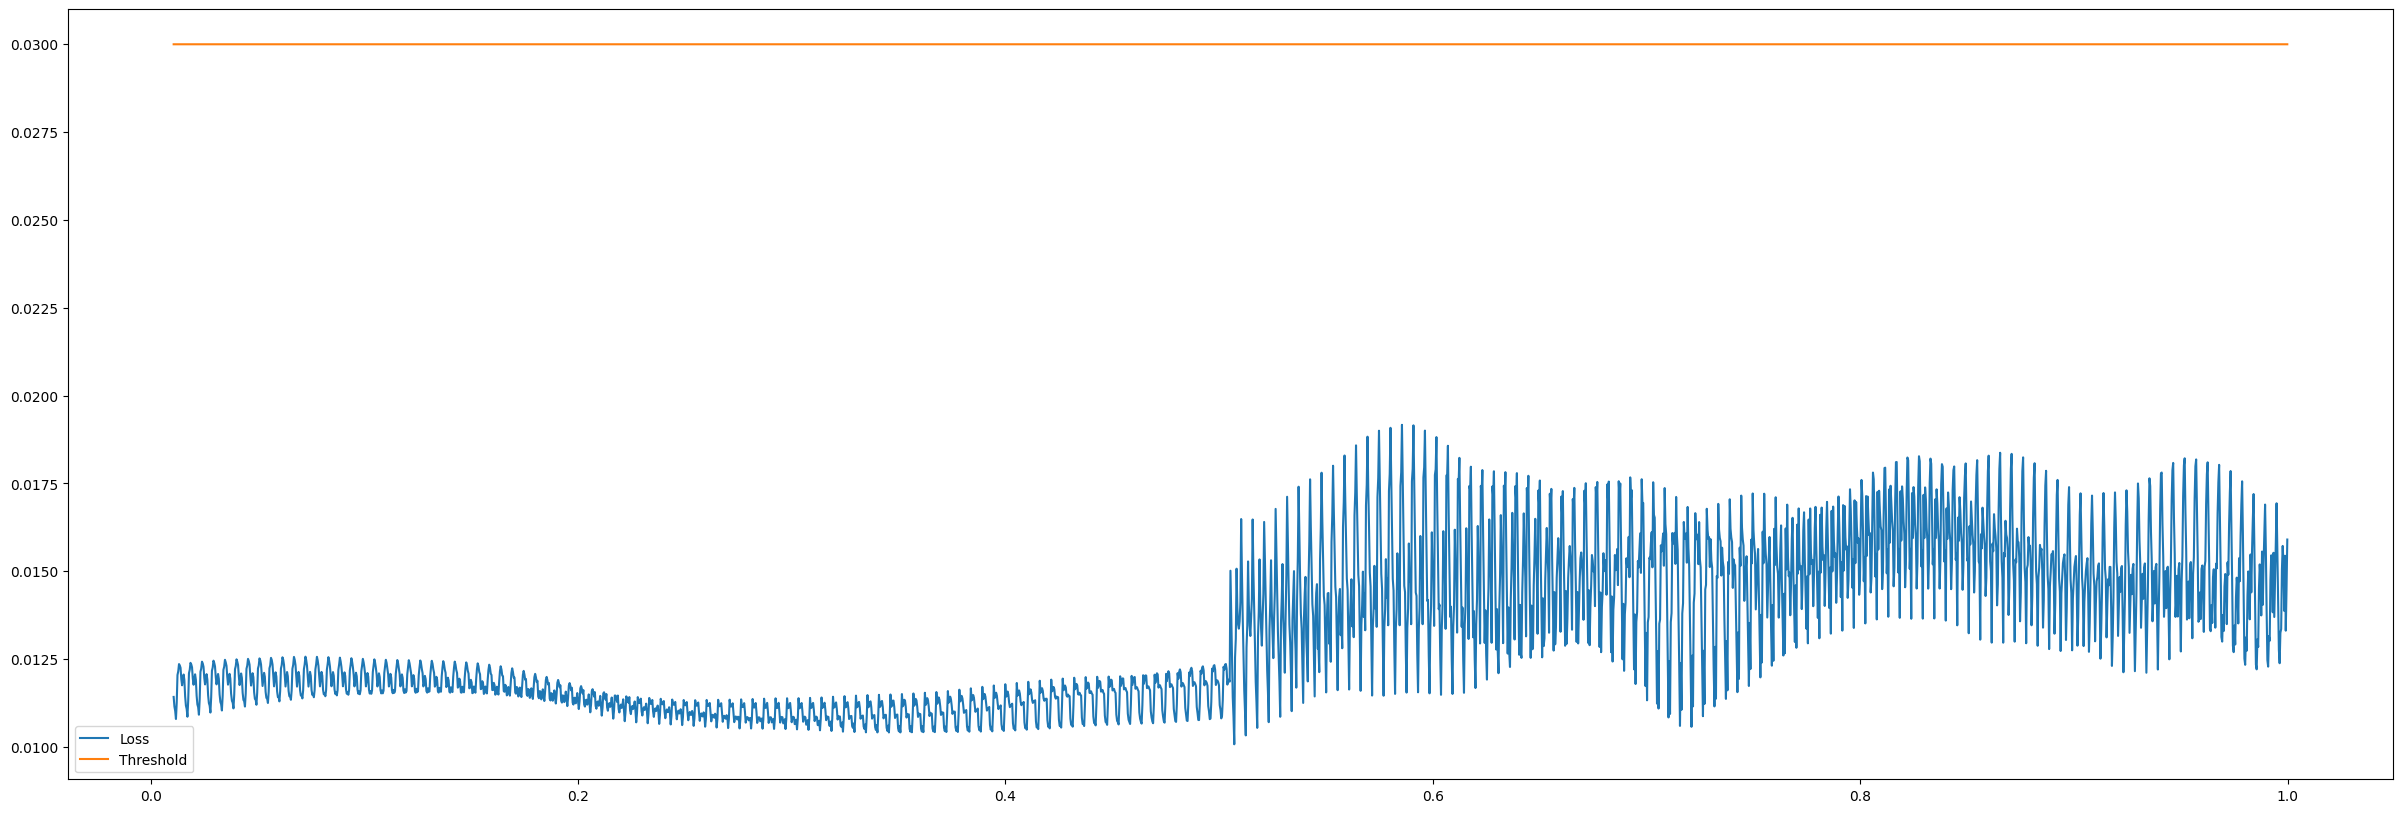

In [132]:
# #plot the threshoold vs the actual loss values
test_score_df = pd.DataFrame(index=df_testID_list[0][TIME_STEP:].Time)
test_score_df['loss_1'] = test_mae_loss[:,0]
test_score_df['loss_2'] = test_mae_loss[:,1]
test_score_df['threshold'] = THRESHOLD
plt.figure(figsize=(30,10))
plt.plot(test_score_df.index,test_score_df.loss_2, label='Loss')
plt.plot(test_score_df.index,test_score_df.threshold, label='Threshold')
plt.legend()

In [ ]:
test_score_df = pd.DataFrame(index=df_testID_list[0][TIME_STEP:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
print(test_score_df.threshold.shape)
print(test_score_df.loss.shape)
# test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
# test_score_df['Signal1_ID1'] = df_testID_list[0][TIME_STEP:].Signal1_of_ID
# test_score_df['Signal1_ID2'] = df_testID_list[1][TIME_STEP:].Signal1_of_ID


# #plot the threshoold vs the actual loss values
# plt.plot(test_score_df.index, test_score_df.loss, label='Loss')
# plt.plot(test_score_df.index, test_score_df.threshold, label='Threshold')
# plt.legend()


# df['meantemp'].plot()
# df['humidity'].plot()
# plt.legend(['Sig1','Sig2'])

# train_set=df[:'2016'].iloc[:,0]
# test_set=df['2016':].iloc[:,0]
# df_normal_grp_ID1['Signal1_of_ID'].head()
# plt.plot(df_normal_grp_ID1['Time'],df_normal_grp_ID1['Signal1_of_ID'])
# df_normal_grp_ID1 = df_normal_grp_ID1.iloc[0:500,:]
# fig = 
# len(df_normal_grp_ID1)
# df_normal_grp_ID1['Signal1'].plot()

(2761,)
(30, 1)


In [ ]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

AttributeError: 'DataFrame' object has no attribute 'anomaly'

In [ ]:
plt.plot(
  df_test_plat_ID1[TIME_STEP:].index, 
  df_test_plat_ID1[TIME_STEP:].Signal1_of_ID, 
  label='close price'
);

sns.scatterplot(
  anomalies.index,
  anomalies.Signal1,
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.legend();